## Importando pacotes

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
df = pd.read_csv('https://www.dropbox.com/s/33gfbmmc09b2olm/listings.csv?dl=1')
df.set_index('id' , inplace = True)

## Limpeza dos dados

In [256]:
print(df.shape)
df.head(3)

(26467, 15)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,190,5,260,2021-02-08,1.98,1,343
24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,311,3,85,2018-02-14,0.66,1,73
35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,267,2,181,2020-03-15,1.98,1,272


In [257]:
df.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [258]:
dados_ausentes = df.isnull().sum() / df.shape[0]
dados_ausentes.sort_values(ascending = False)

neighbourhood_group               1.000000
last_review                       0.371179
reviews_per_month                 0.371179
host_name                         0.032380
name                              0.001096
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [259]:
df.drop(columns = 'neighbourhood_group' , inplace = True)

In [260]:
filtro = df.loc[df['last_review'].isnull()].index
df.drop(filtro , inplace = True)

In [261]:
filtro = df.loc[df['host_name'].isnull()].index
df.loc[filtro , 'host_name'] = 'Desconhecido'

In [262]:
filtro = df.loc[df['name'].isnull()].index
df.loc[filtro , 'name'] = 'Desconhecido'

In [263]:
dados_ausentes = df.isnull().sum() / df.shape[0]
dados_ausentes.sort_values(ascending = False)

name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

## Ánalise

In [264]:
print(df.shape)
df.head(3)

(16643, 14)


,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,Copacabana,-22.96599,-43.17940,Entire home/apt,190,5,260,2021-02-08,1.98,1,343
24480,Nice and cozy near Ipanema Beach,99249,Goya,Ipanema,-22.98405,-43.20189,Entire home/apt,311,3,85,2018-02-14,0.66,1,73
35636,Cosy flat close to Ipanema beach,153232,Patricia,Ipanema,-22.98839,-43.19232,Entire home/apt,267,2,181,2020-03-15,1.98,1,272


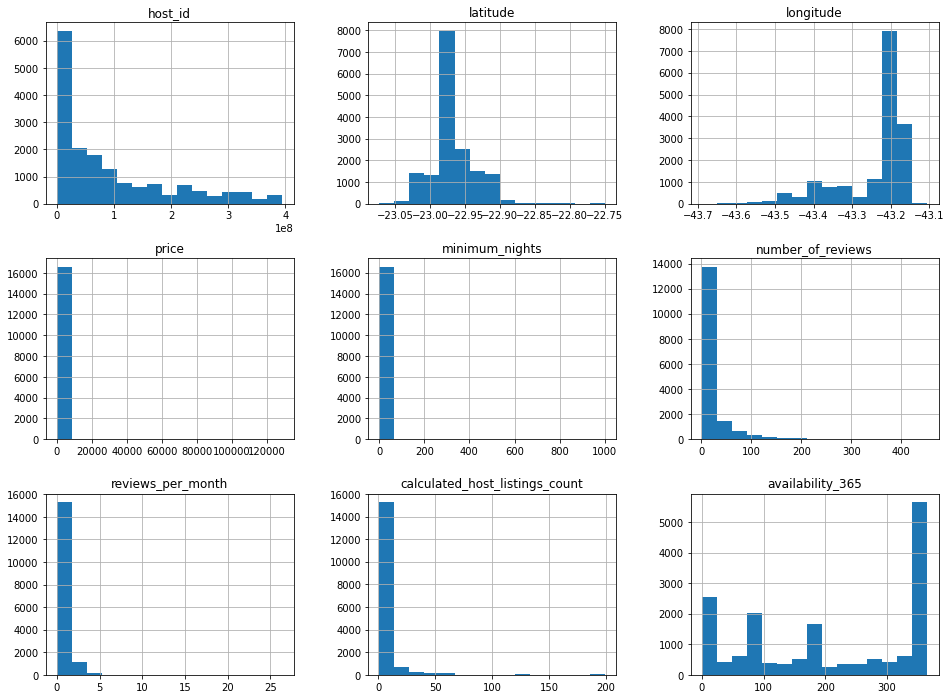

In [265]:
df.hist(bins = 15 , figsize = (16,12));

### Identificando outliers

Procuramos eliminar os outliers para impedir uma análise enviesada.

In [266]:
def box_plot(variavel):
  df[variavel].plot(kind = 'box' , vert = False , figsize = (15,3))
  plt.title(f'Box plot de {variavel}' , fontsize = 16)

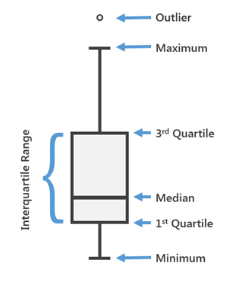

Checando a quantidade e porcentagem de acordo com medidas específicas.

In [267]:
def checar(variavel , quantidade):
  print('Quantidade de entradas: {}'.format(len(df.loc[df[variavel] > quantidade])))
  print('Porcentagem em relação ao total: {:.4f}%'.format((len(df.loc[df[variavel] > quantidade]) / df.shape[0]) * 100))

#### Noites mínimas

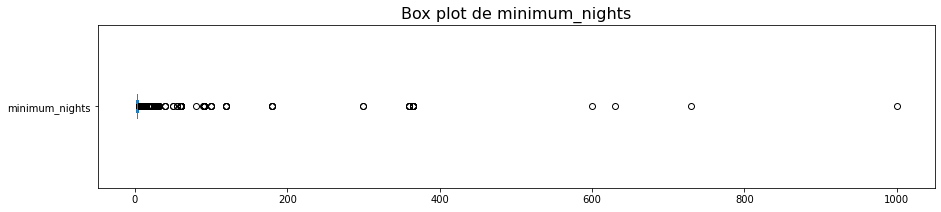

In [268]:
box_plot('minimum_nights')

Identificando casos em que imóveis foram alugados acima de 30 noites:

In [269]:
checar('minimum_nights' , 30)

Quantidade de entradas: 77
Porcentagem em relação ao total: 0.4627%


#### Preço

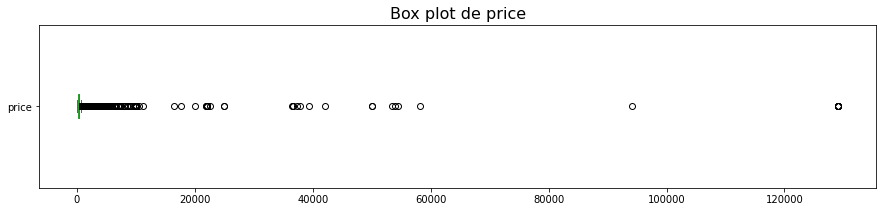

In [270]:
box_plot('price')

In [271]:
checar('price' , 5000)

Quantidade de entradas: 86
Porcentagem em relação ao total: 0.5167%


Definimos um ponto de corte (nesse caso sem o uso de IQR) e agora executamos para deixar os dados mais precisos.

In [272]:
df.drop(df[df['minimum_nights'] > 30].index, axis=0, inplace=True)
df.drop(df[df['price'] > 5000].index, axis=0, inplace=True)

In [273]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.648900e+04,16489.000000,16489.000000,16489.000000,16489.000000,16489.000000,16489.000000,16489.000000,16489.000000
mean,9.249041e+07,-22.967573,-43.239084,343.914003,3.087937,19.862636,0.583756,5.519680,206.164837
std,1.022554e+08,0.033009,0.090388,424.590051,3.428274,36.413885,0.826306,14.866105,139.257431
min,3.607000e+03,-23.072620,-43.689720,29.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,1.296710e+07,-22.984440,-43.242640,135.000000,2.000000,2.000000,0.090000,1.000000,87.000000
50%,5.212114e+07,-22.972650,-43.193260,218.000000,2.000000,6.000000,0.260000,2.000000,180.000000
75%,1.453519e+08,-22.956700,-43.185010,380.000000,3.000000,20.000000,0.770000,3.000000,362.000000
max,3.949830e+08,-22.749690,-43.105380,5000.000000,30.000000,452.000000,26.430000,199.000000,365.000000


### Correlação entre as variáveis

In [274]:
correlacao = df.corr()
correlacao = correlacao.loc['price' , 'minimum_nights']
print(f'A correlação entre preço e noites mínimas é de: {correlacao.round(2)}')

A correlação entre preço e noites mínimas é de: 0.04


### Tipo de imóvel mais alugado

In [275]:
df['room_type'].value_counts(ascending = False)

Entire home/apt    12315
Private room        3833
Shared room          272
Hotel room            69
Name: room_type, dtype: int64

### Bairros mais caros

In [276]:
df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = False)[:10]

neighbourhood
Joá                  1310.658537
Alto da Boa Vista     939.619048
Guaratiba             604.416667
Sepetiba              600.000000
São Conrado           598.633663
Abolição              597.000000
Lagoa                 583.480000
Itanhangá             553.673913
Vargem Grande         540.918919
Realengo              540.500000
Name: price, dtype: float64

In [278]:
print(df[df['neighbourhood'] == 'Abolição'].shape[0])

1


## Conclusão

Após a limpeza inicial do dataframe, na qual exclui e preenchi colunas com dados ausentes, decidi fazer uma análise em relação aos preços e noites mínimas. Nesse quesito, é notável que a maioria dos atendimentos são realizados para menos de um mês, visto que ocasiões com uma duração maior representam apenas aproximadamente 0,5% dos casos. Além disso, podemos racionar da mesma forma para os preços no patamar de 5000 reais, dificilmente passando desse preço (aproximadamente 0,5% também), com isso, identificando outliers nos dois casos e removendo-os logo depois. Ademais, o tipo de imóvel mais alugado provou-se ser um apartamento ou casa inteira, resultado que considerei normal na medida em que é a principal proposta do Airbnb. Em suma, ao analisar os bairros mais caros na média, percebi o bairro Abolição acima de Lagoa e Itanhangá, e ao analisar a quantidade de pedidos para esse bairro, conclui que um único pedido estava acima da média dos outros dois bairros. Por fim, esse fato deixa claro como a quantidade de dados pode alterar seus resultados e nosso entedimento em relação a eles e a realidade